In [104]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from random import sample
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [106]:
ds = pd.read_csv("Glass.csv",sep = ',',names = ["Id", "RI", "Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"])
ds= ds.drop(labels = "Id", axis = 1)
ds.sample(10)
ds.head()
ds.Type.unique()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1
58,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.00,0.00,1
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14,1
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
148,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.00,0.10,3
89,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09,2
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
52,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,1
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


array([1, 2, 3, 5, 6, 7])

## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [107]:
ds.head(2)
ds.isnull().sum()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [108]:
ds.size
ds.shape
ds.describe(include='all')
ds.dtypes


2140

(214, 10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [109]:
ds["Type"] = ds.Type.astype('category')
ds.dtypes

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Type    category
dtype: object

In [110]:
#Splitting Data into Dependent and independent Variable 
x = ds.iloc[:,0:-1]
y = ds.iloc[:,-1]
y.head(2)
x.head(2)

0    1
1    1
Name: Type, dtype: category
Categories (6, int64): [1, 2, 3, 5, 6, 7]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [111]:
import seaborn as sns
%matplotlib inline

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


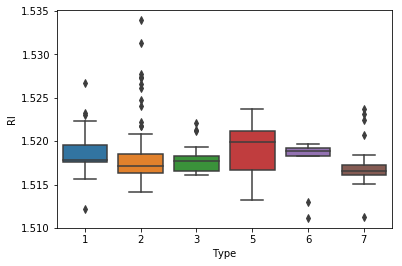

In [112]:
ds.head(2)
sns.boxplot(x='Type', y='RI', data =ds)

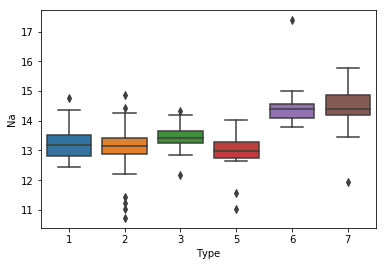

In [113]:
# "Na","Mg","Al","Si","K","Ca","Ba","Fe"
sns.boxplot(x='Type', y='Na', data =ds)

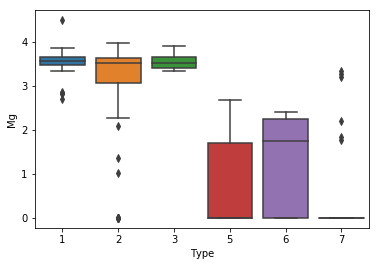

In [114]:
# "Mg","Al","Si","K","Ca","Ba","Fe"
sns.boxplot(x='Type', y='Mg', data =ds)

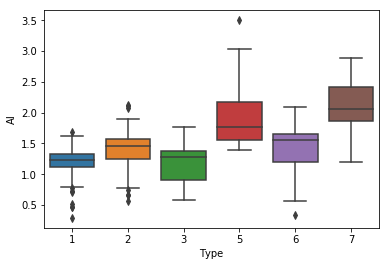

In [115]:
# "Mg","Al","Si","K","Ca","Ba","Fe"
sns.boxplot(x='Type', y='Al', data =ds)

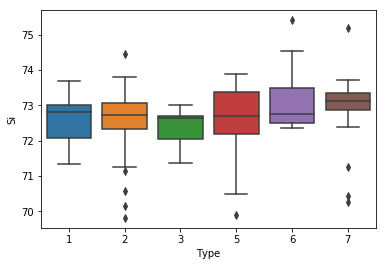

In [116]:
# "Mg","Al","Si","K","Ca","Ba","Fe"
sns.boxplot(x='Type', y='Si', data =ds)

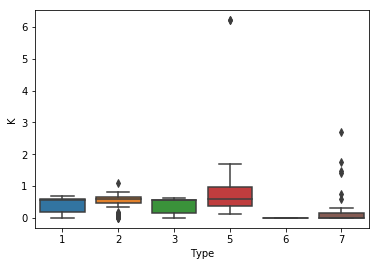

In [117]:
# ""K","Ca","Ba","Fe"
sns.boxplot(x='Type', y='K', data =ds)

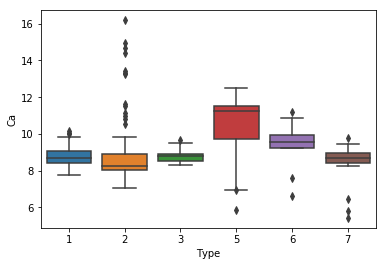

In [118]:
# "Mg","Al","Si","K","Ca","Ba","Fe"
sns.boxplot(x='Type', y="Ca", data =ds)

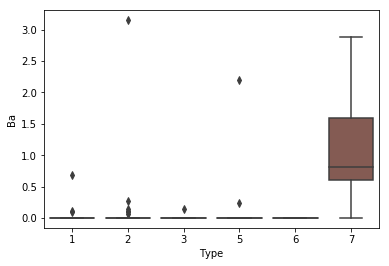

In [119]:
# "Mg","Al","Si","K","Ca","Ba","Fe"
sns.boxplot(x='Type', y='Ba', data =ds)

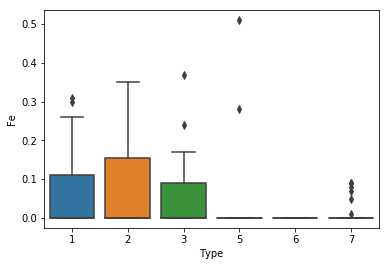

In [120]:
# "Mg","Al","Si","K","Ca","Ba","Fe"
sns.boxplot(x='Type', y='Fe', data =ds)

In [121]:
ds.describe(include = 'all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,NaN
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,NaN
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,NaN
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,NaN
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,NaN
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,NaN


## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [122]:
ds.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [123]:
for i in range(0,ds.shape[1]):
    print ("Variance of population",ds.columns.values[i],"=",st.variance(ds.iloc[:,i]))

Variance of population RI = 9.2225413715941e-06
Variance of population Na = 0.6668413672063533
Variance of population Mg = 2.0805403909437934
Variance of population Al = 0.24927017901803344
Variance of population Si = 0.5999211881883196
Variance of population K = 0.4253542034136282
Variance of population Ca = 2.0253658483611954
Variance of population Ba = 0.24722699311131588
Variance of population Fe = 0.00949430038172963
Variance of population Type = 4.425716291518582


In [124]:
#As the Variance of Fe,RI is <0 , Have to Drop the Variable 
ds =ds.drop(columns="Fe")
ds =ds.drop(columns="RI")


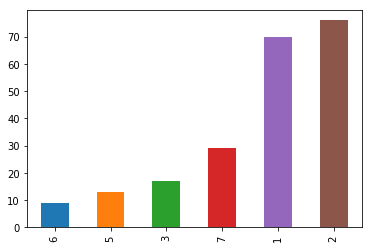

In [151]:
value_count  = ds.Type.value_counts()
value_count.sort_values(ascending=True).plot(kind= 'bar',)


In [156]:
from random import sample

In [158]:
ds[ds.Type == 6].sample(60,replace = True)

,Na,Mg,Al,Si,K,Ca,Ba,Type
179,14.09,2.19,1.66,72.67,0.0,9.32,0.0,6
181,14.99,0.78,1.74,72.50,0.0,9.95,0.0,6
184,17.38,0.00,0.34,75.41,0.0,6.65,0.0,6
178,14.46,2.24,1.62,72.38,0.0,9.26,0.0,6
184,17.38,0.00,0.34,75.41,0.0,6.65,0.0,6
183,14.56,0.00,0.56,73.48,0.0,11.22,0.0,6
182,14.15,0.00,2.09,72.74,0.0,10.88,0.0,6
183,14.56,0.00,0.56,73.48,0.0,11.22,0.0,6
181,14.99,0.78,1.74,72.50,0.0,9.95,0.0,6
178,14.46,2.24,1.62,72.38,0.0,9.26,0.0,6


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

In [125]:
ds.var().to_frame().T

,Na,Mg,Al,Si,K,Ca,Ba,Type
0,0.666841,2.08054,0.24927,0.599921,0.425354,2.025366,0.247227,4.425716


In [126]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b174c50>,
      dtype=object)

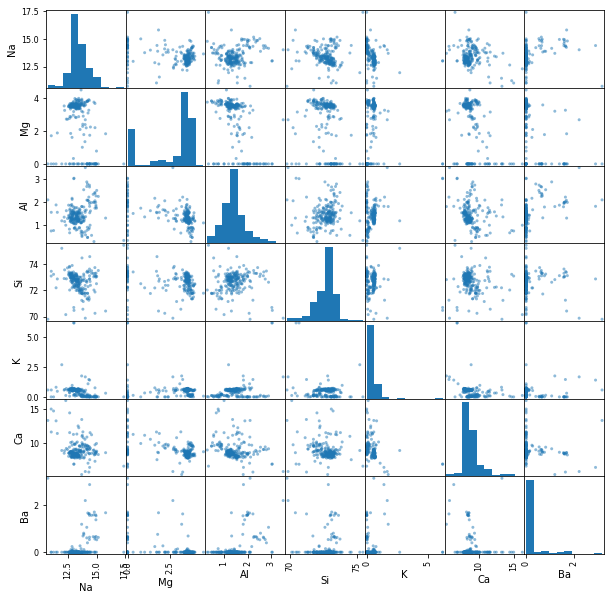

In [127]:
scatter_matrix(ds,alpha=0.5,figsize= (10,10))

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [128]:
#Splitting Data To Train and Test set
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 99)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(3,10,3):
    classfier = KNeighborsClassifier(n_neighbors=i,p=1,algorithm='auto')
    classfier.fit(x_train,y_train)
    y_pred = classfier.predict(x_test)
    print ("for the value of k = ",i,"accuracy lable is = ",accuracy_score(y_test,y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')

for the value of k =  3 accuracy lable is =  0.7692307692307693


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=1,
           weights='uniform')

for the value of k =  6 accuracy lable is =  0.6923076923076923


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=1,
           weights='uniform')

for the value of k =  9 accuracy lable is =  0.6923076923076923


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [143]:
mse = []
k = []
for i in range(1,20):
    k.append(i)
    classfier = KNeighborsClassifier(n_neighbors=i,p=2,algorithm='auto')
    classfier.fit(x_train,y_train)
    y_pred = classfier.predict(x_test)
    a = accuracy_score(y_test,y_pred)
    print ("for the value of k = ",i,"accuracy lable is = ",a)
    print ("MSE value is ",1-a)
    mse.append(1-a)
print (mse)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

for the value of k =  1 accuracy lable is =  0.7230769230769231
MSE value is  0.27692307692307694


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

for the value of k =  2 accuracy lable is =  0.7384615384615385
MSE value is  0.2615384615384615


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

for the value of k =  3 accuracy lable is =  0.7384615384615385
MSE value is  0.2615384615384615


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

for the value of k =  4 accuracy lable is =  0.7076923076923077
MSE value is  0.29230769230769227


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

for the value of k =  5 accuracy lable is =  0.6615384615384615
MSE value is  0.3384615384615385


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

for the value of k =  6 accuracy lable is =  0.6615384615384615
MSE value is  0.3384615384615385


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

for the value of k =  7 accuracy lable is =  0.6153846153846154
MSE value is  0.3846153846153846


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

for the value of k =  8 accuracy lable is =  0.6307692307692307
MSE value is  0.36923076923076925


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

for the value of k =  9 accuracy lable is =  0.6461538461538462
MSE value is  0.3538461538461538


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

for the value of k =  10 accuracy lable is =  0.676923076923077
MSE value is  0.32307692307692304


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

for the value of k =  11 accuracy lable is =  0.6615384615384615
MSE value is  0.3384615384615385


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

for the value of k =  12 accuracy lable is =  0.6615384615384615
MSE value is  0.3384615384615385


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

for the value of k =  13 accuracy lable is =  0.6615384615384615
MSE value is  0.3384615384615385


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

for the value of k =  14 accuracy lable is =  0.6461538461538462
MSE value is  0.3538461538461538


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

for the value of k =  15 accuracy lable is =  0.676923076923077
MSE value is  0.32307692307692304


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

for the value of k =  16 accuracy lable is =  0.676923076923077
MSE value is  0.32307692307692304


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

for the value of k =  17 accuracy lable is =  0.6615384615384615
MSE value is  0.3384615384615385


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

for the value of k =  18 accuracy lable is =  0.6461538461538462
MSE value is  0.3538461538461538


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

for the value of k =  19 accuracy lable is =  0.6615384615384615
MSE value is  0.3384615384615385
[0.27692307692307694, 0.2615384615384615, 0.2615384615384615, 0.29230769230769227, 0.3384615384615385, 0.3384615384615385, 0.3846153846153846, 0.36923076923076925, 0.3538461538461538, 0.32307692307692304, 0.3384615384615385, 0.3384615384615385, 0.3384615384615385, 0.3538461538461538, 0.32307692307692304, 0.32307692307692304, 0.3384615384615385, 0.3538461538461538, 0.3384615384615385]


In [144]:
m = mse.index(min(mse))
print("For Lowest msc the k value is:", m+1)

For Lowest msc the k value is: 2


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [145]:
import matplotlib.pyplot as ply
%matplotlib inline

Text(0.5,0,'Value of K')

Text(0,0.5,'value of MSE')

Text(0.5,1,'K Vs EMS')

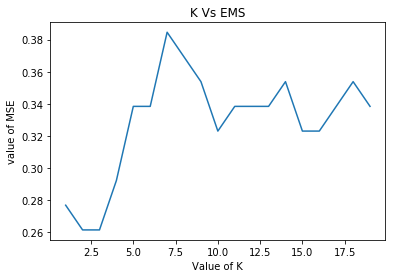

In [146]:
ply.plot(k,mse)
plt.xlabel ("Value of K")
plt.ylabel("value of MSE")
plt.title("K Vs EMS")
plt.show()